# 1. Importando bibliotecas

In [19]:
# !pip install pandas_ta
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas_ta
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [3]:
from funcoes import *
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf
import pandas as pd
import time
from decimal import Decimal
import os

# 2. Obtendo os dados historicos das ações

## 2.1 Parâmetros

In [4]:
lista_acoes = [    
    'PETR4.SA',    # Petrobras
    'TAEE11.SA',   # Taesa    
    'NVDA',        # Nvidia
    'BBAS3.SA',    # Bradesco
    'NFLX',        # Netflix     
    'EA',          # EA
    'TSLA']        # Tesla

data_inicio = '2020-01-01' # data de inicio do historico que voce deseja obter
data_fim = '2023-12-31'    # data final do perido para o historico
# FORMATO-> "AAAA-MM-DD" 

In [5]:
%%time

hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA

"""
    Informacao sobre os dados historicos gerados:
        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> 
            "Date"     : representa a data do registro no formato "AAAA-MM-DD"
            "Open"     : Preco de abertura do dia
            "High"     : Preco mais alto do dia
            "Low"      : Preco mais baixo do dia
            "Close"    : Preco de fechamendo do dia
            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)
            "Volume"   : Representa o numero total de acoes negociadas durante o dia
"""


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CPU times: total: 781 ms
Wall time: 9.39 s


'\n    Informacao sobre os dados historicos gerados:\n        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> \n            "Date"     : representa a data do registro no formato "AAAA-MM-DD"\n            "Open"     : Preco de abertura do dia\n            "High"     : Preco mais alto do dia\n            "Low"      : Preco mais baixo do dia\n            "Close"    : Preco de fechamendo do dia\n            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)\n            "Volume"   : Representa o numero total de acoes negociadas durante o dia\n'

# 3. Indicadores técnicos

### 3.1 SMA

In [6]:
%%time

MM_sma(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'SMA'(SIMPLE MOVING AVERAGE ou MEDIA MOVEL SIMPLES)

CPU times: total: 0 ns
Wall time: 191 ms


### 3.2 EMA

In [7]:
%%time

MM_ema(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'EMA'(EXPONENTIAL MOVING AVERAGE ou MEDIA MOVEL EXPONENCIAL)

CPU times: total: 31.2 ms
Wall time: 165 ms


### 3.3 RSI

In [8]:
%%time

MM_rsi(lista_acoes)

CPU times: total: 62.5 ms
Wall time: 182 ms


### 3.4 MACD

In [9]:
%%time

MM_macd(lista_acoes)

CPU times: total: 78.1 ms
Wall time: 238 ms


### 3.5 Bollinger Bands

In [10]:
%%time

MM_bb(lista_acoes) # FUNCAO PARA OBTER OS INDICADORES BB(Bollinger Band) dos ativos

CPU times: total: 93.8 ms
Wall time: 319 ms


### 3.6 ATR

In [11]:
%%time

MM_atr(lista_acoes) # FUNCAO PARA OBTER O INDICADOR "ATR" (AVERAGE TRUE RANGE)

CPU times: total: 46.9 ms
Wall time: 302 ms


### 3.7 Indicador Estocástico

In [12]:
%%time

MM_estc(lista_acoes)

CPU times: total: 78.1 ms
Wall time: 340 ms


# 4. Data Wrangling

### 4.1 Removendo colunas que não seram usadas

In [13]:
%%time

# Defina o caminho da pasta
caminho_pasta = 'Base_dados'

# Pega o nome dos arquivos da pasta e armazena numa lista
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

# Exibe a lista com os nomes dos arquivos
#print(lista_arquivos)

lista_colunas = ['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0']

for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}")    
    df = df.drop(columns=lista_colunas)
    df = df.set_index('Date')
    
print(arq)
df.head(20)


hist_TSLA
CPU times: total: 15.6 ms
Wall time: 124 ms


,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
Date,,,,,,,,,,,,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,NaN,NaN,NaN,0.067806,0.054245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,NaN,NaN,NaN,0.165522,0.121568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,NaN,NaN,NaN,0.333367,0.231531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,NaN,NaN,NaN,0.583813,0.385582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,NaN,NaN,NaN,0.715943,0.414169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,32.119331,32.329334,31.580000,31.876667,31.876667,194392500,NaN,NaN,NaN,0.794340,0.394053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,32.900002,35.042000,32.799999,34.990665,34.990665,397764000,NaN,NaN,NaN,1.095119,0.555866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,36.284000,36.493999,34.993332,35.861332,35.861332,434943000,NaN,NaN,NaN,1.387748,0.678795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Removendo linhas com valores NAN

In [14]:
df.dropna(inplace=True)  # Remove linhas com valores ausentes

### 4.3 Convertendo os valores das Colunas

In [15]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#nome_colunas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
nomes_dascolunas = df.columns.tolist()

for col in nomes_dascolunas:
    df[col] = df[col].astype(float)  # Converte uma coluna em decimal


### 4.4 Descobrir se há Outliers

Axes(0.125,0.11;0.775x0.77)
Open


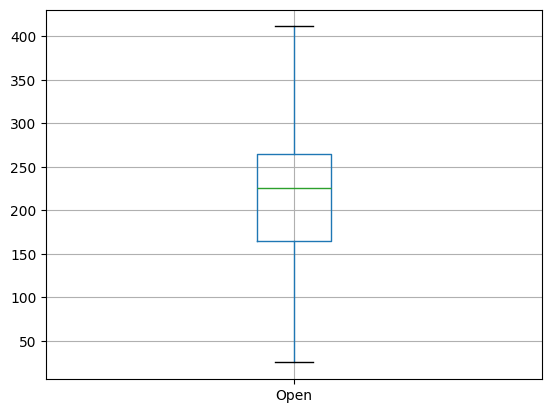

Axes(0.125,0.11;0.775x0.77)
High


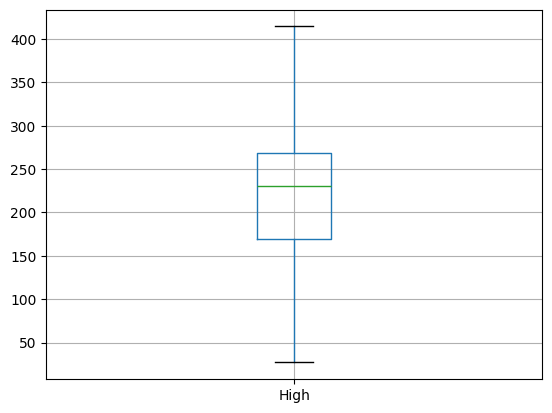

Axes(0.125,0.11;0.775x0.77)
Low


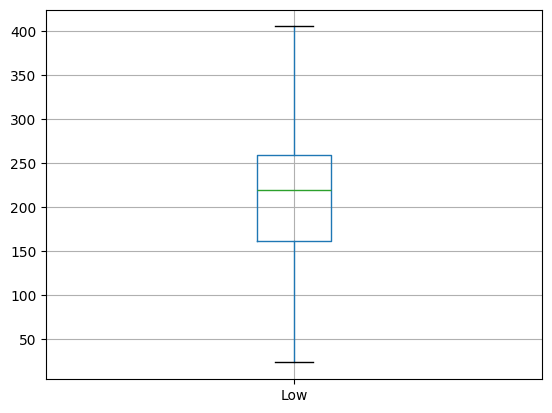

Axes(0.125,0.11;0.775x0.77)
Close


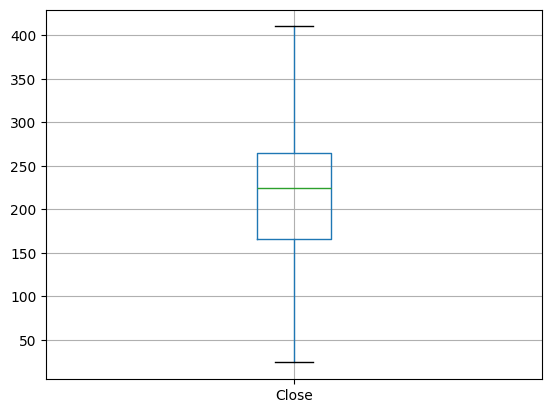

Axes(0.125,0.11;0.775x0.77)
Adj Close


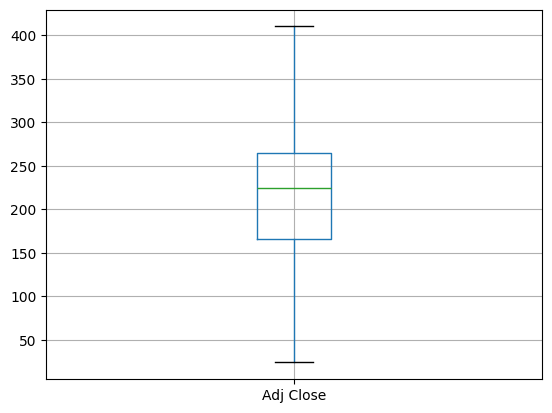

Axes(0.125,0.11;0.775x0.77)
Volume


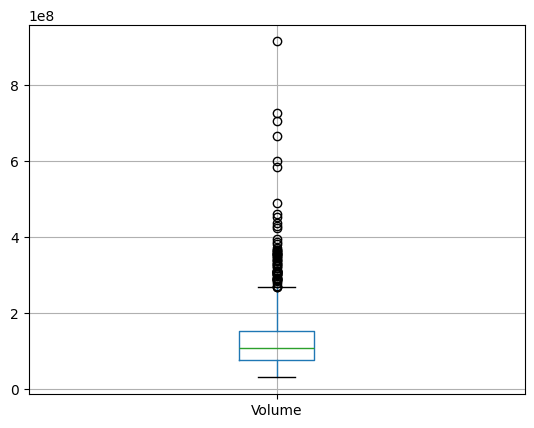

Axes(0.125,0.11;0.775x0.77)
SMA_10


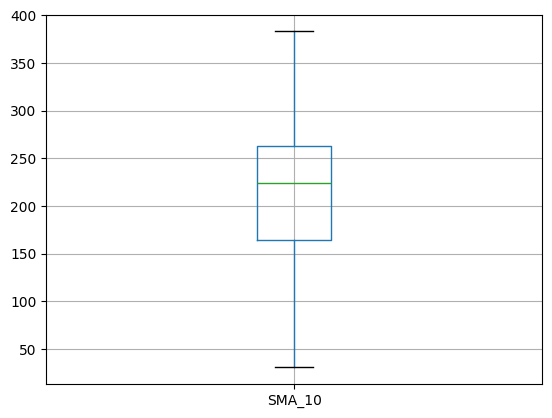

Axes(0.125,0.11;0.775x0.77)
EMA_10


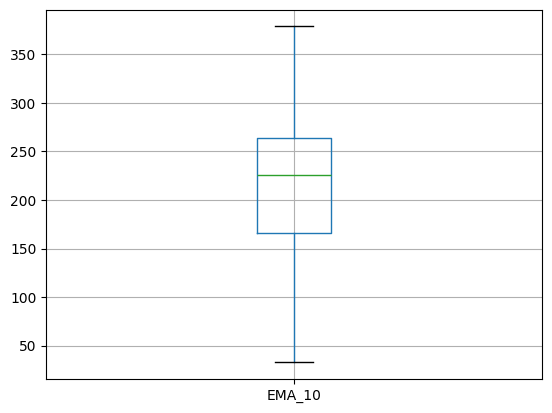

Axes(0.125,0.11;0.775x0.77)
RSI_10


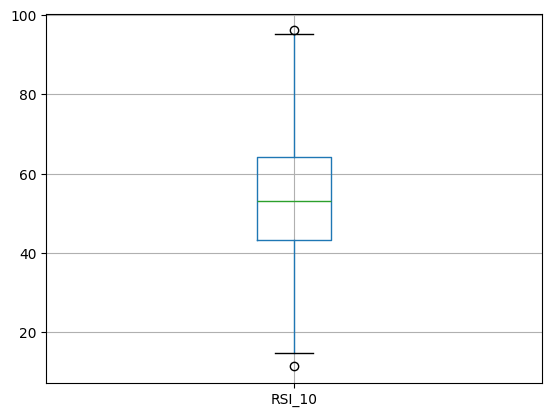

Axes(0.125,0.11;0.775x0.77)
MACD


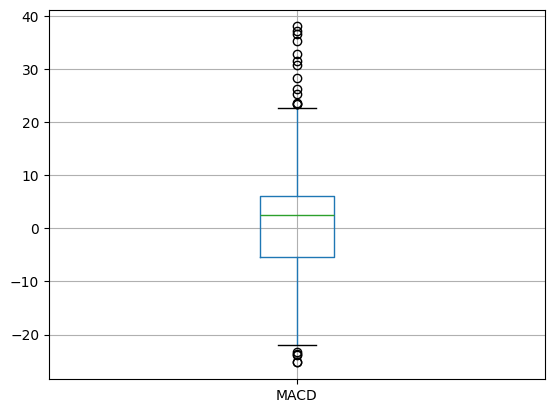

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


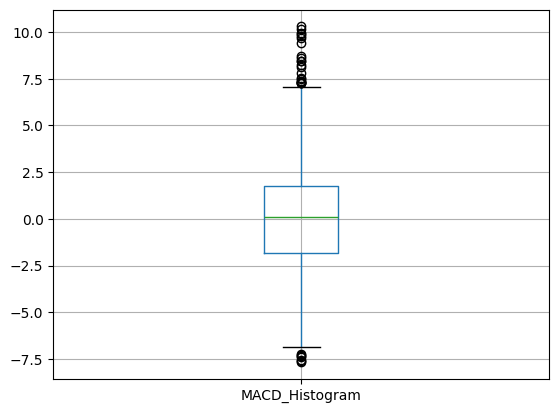

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


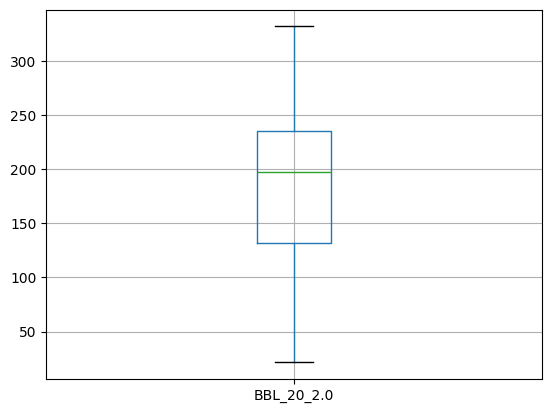

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


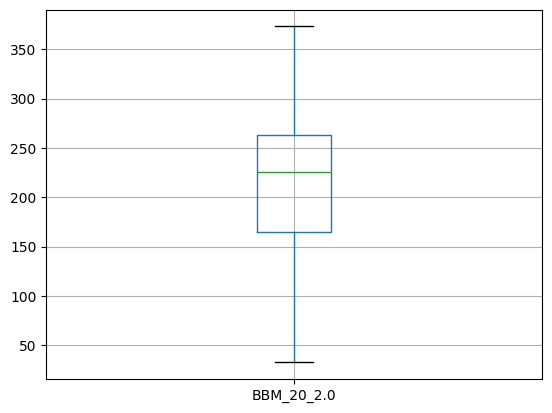

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


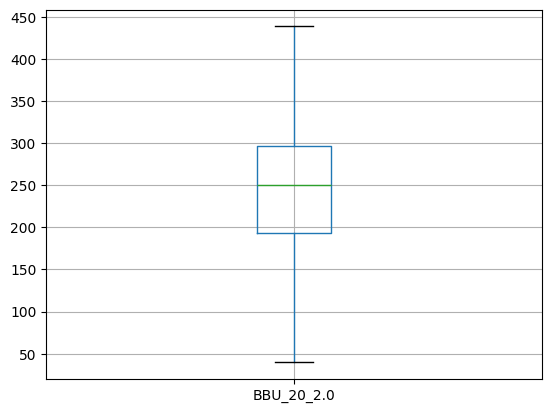

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


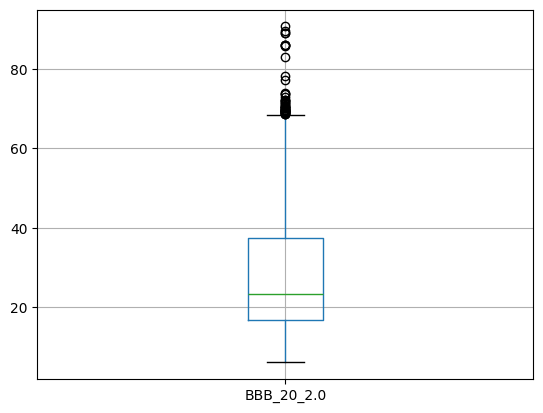

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


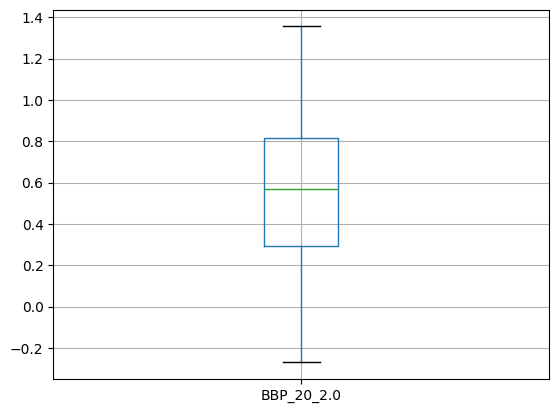

Axes(0.125,0.11;0.775x0.77)
ATRr_14


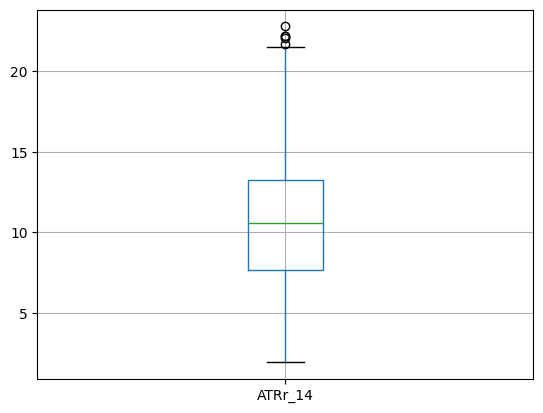

Axes(0.125,0.11;0.775x0.77)
stoch_k


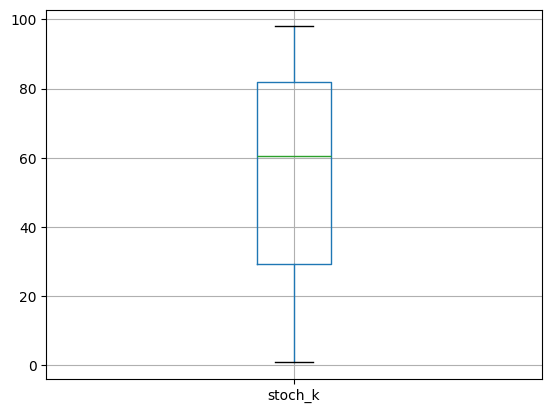

Axes(0.125,0.11;0.775x0.77)
stoch_d


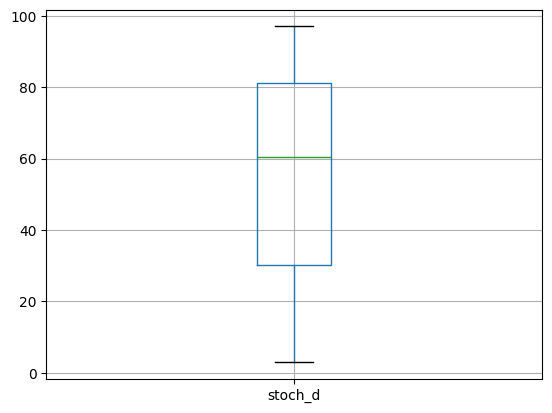

In [16]:
for colout in nomes_dascolunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()  # Garante que o gráfico seja renderizado

267288225.0
-38321175.0


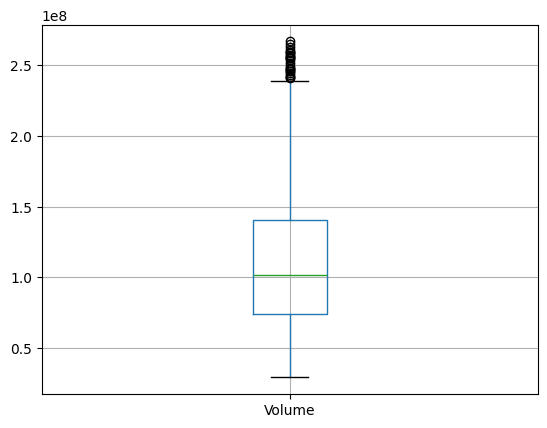

In [17]:
# Exemplo com uma coluna de dados 'SMA_10'
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar e armazenar os outliers
df = df[(df['Volume'] > limite_inferior) & (df['Volume'] < limite_superior)]

print(limite_superior)
print(limite_inferior)

df.boxplot(column='Volume')
plt.show()


# # Exibir os outliers
# print(outliers)

# # Opcional: Salvar os outliers em um arquivo CSV
# outliers.to_csv('outliers_Volume.csv', index=False)


In [18]:
df.info()
#opa

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 2020-01-31 to 2023-12-29
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            925 non-null    float64
 1   High            925 non-null    float64
 2   Low             925 non-null    float64
 3   Close           925 non-null    float64
 4   Adj Close       925 non-null    float64
 5   Volume          925 non-null    float64
 6   SMA_10          925 non-null    float64
 7   EMA_10          925 non-null    float64
 8   RSI_10          925 non-null    float64
 9   MACD            925 non-null    float64
 10  MACD_Histogram  925 non-null    float64
 11  BBL_20_2.0      925 non-null    float64
 12  BBM_20_2.0      925 non-null    float64
 13  BBU_20_2.0      925 non-null    float64
 14  BBB_20_2.0      925 non-null    float64
 15  BBP_20_2.0      925 non-null    float64
 16  ATRr_14         925 non-null    float64
 17  stoch_k         925 non-

In [20]:
print("teste")

teste
